# LAB 02 - CO544 - Data Visualization

## 1. Importing Data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
gapminder_df = pd.read_csv('gapminder.tsv', sep='\t') #Read the dataset
gapminder_df.head() #Display first few rows of the dataset

In [ ]:
recent_year = gapminder_df['year'].max() #Get the most recent year
recent_year_df = gapminder_df[gapminder_df['year'] == recent_year] #Filter the dataframe based on the most recent year
recent_year_df.shape #Shape of the new dataframe
recent_year_df['gdpPercap'].describe()

## 2. Histograms

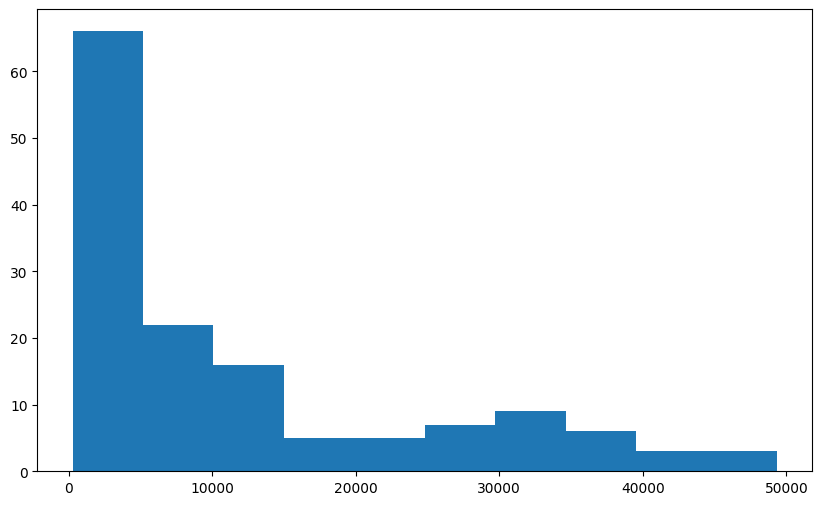

In [4]:
plt.figure(figsize=(10, 6)) #Create a figure
plt.hist(recent_year_df['gdpPercap']); #Plot the histogram

In [ ]:
plt.hist(recent_year_df['gdpPercap']) #Plot the histogram
plt.title('Distribution of Global Per-Capita GDP in 2007') #Add a title to the plot
plt.xlabel('Per-Capita GDP (In dollars)') #Add labels to the axes
plt.ylabel('Number of countries') #Add labels to the axes

In [ ]:
plt.hist(recent_year_df['gdpPercap'], bins=20)
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (In dollars)')
plt.ylabel('Number of countries')

In [10]:
countries_df = gapminder_df[['country', 'continent']] #New dataframe with selected features
countries_df = countries_df.drop_duplicates() #Drop duplicate combinations
countries_df.shape

(142, 2)